In [2]:
import pandas as pd 
data=pd.read_csv(r"D:\sem4\Machine Learning\national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset\NHANES_age_prediction.csv")

In [3]:
data.head(5)

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [4]:
data1=data.drop(columns=['SEQN','age_group'],inplace=False,axis=1)

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot

import re
import sklearn

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [93]:
data1['DIQ010'].value_counts()

DIQ010
2.0    2199
3.0      58
1.0      21
Name: count, dtype: int64

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(data1[['RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']])
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


   Variable        VIF
0     const  81.362666
1  RIDAGEYR   1.208302
2  RIAGENDR   1.076033
3    PAQ605   1.034947
4    BMXBMI   1.559536
5    LBXGLU   1.997001
6    LBXGLT   2.084609
7     LBXIN   1.589339


### Since there is no value above 5 we can safely say that there is no multi colinearity issue

<Axes: >

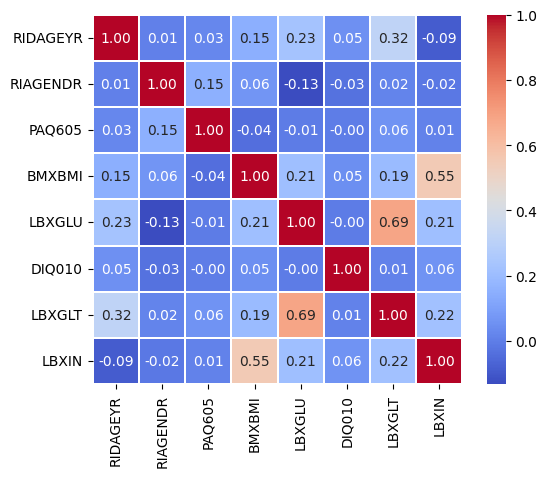

In [10]:
sns.heatmap(data1.corr(), annot=True, fmt=".2f",linewidths=0.1, vmax=1.0, square=True, cmap='coolwarm')

In [6]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data1.drop('DIQ010', axis=1), data1['DIQ010'], test_size=0.2, random_state=0)

DIQ010
2.0    1759
3.0      47
1.0      16
Name: count, dtype: int64


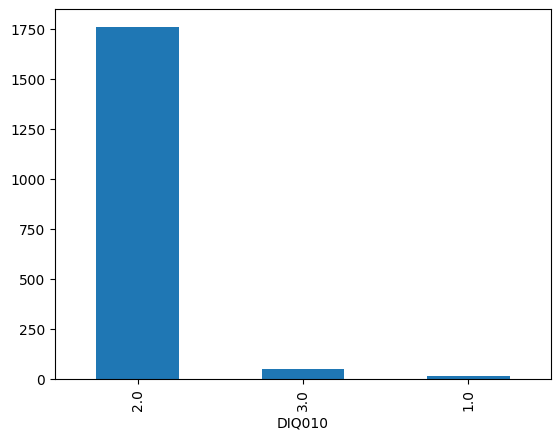

In [13]:
ytrain.value_counts().plot(kind='bar')
print(ytrain.value_counts())

In [7]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_resampled_smote, y_resampled_smote = sm.fit_resample(xtrain, ytrain)


<Axes: xlabel='DIQ010'>

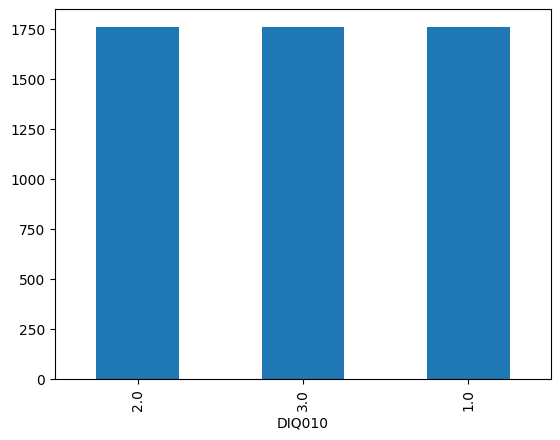

In [8]:
y_resampled_smote.value_counts().plot(kind='bar')

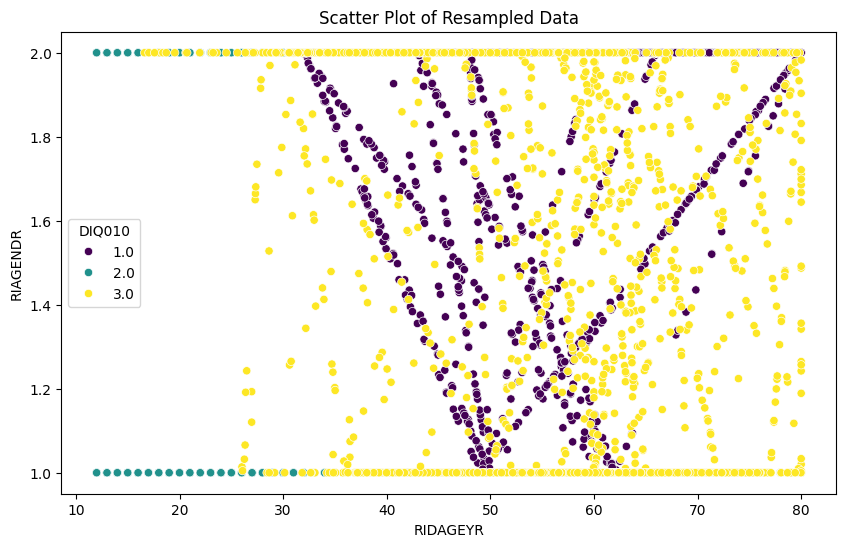

In [16]:
# Convert the resampled data to a DataFrame for easier plotting
resampled_data = pd.DataFrame(X_resampled_smote, columns=xtrain.columns)
resampled_data['DIQ010'] = y_resampled_smote

#showing a scatter plot of the resampled data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=resampled_data, x=resampled_data.columns[0], y=resampled_data.columns[1], hue='DIQ010', palette='viridis')
plt.title('Scatter Plot of Resampled Data')
plt.xlabel(resampled_data.columns[0])
plt.ylabel(resampled_data.columns[1])
plt.legend(title='DIQ010')
plt.show()

In [102]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
rf = RandomForestClassifier(n_estimators=200, random_state=0,class_weight='balanced', criterion='gini',bootstrap=True, max_depth = None, min_samples_leaf= 1,min_samples_split= 5)
rf.fit(xtrain, ytrain)
rf_pred = rf.predict(xtest)
print("Random Forest Classifier on Original test train:")
print("Accuracy: ", accuracy_score(ytest, rf_pred))
print("Confusion Matrix: \n", confusion_matrix(ytest, rf_pred))
print("Classification Report: \n", classification_report(ytest, rf_pred))

Random Forest Classifier on Original test train:
Accuracy:  0.9649122807017544
Confusion Matrix: 
 [[  0   5   0]
 [  0 440   0]
 [  0  11   0]]
Classification Report: 
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         5
         2.0       0.96      1.00      0.98       440
         3.0       0.00      0.00      0.00        11

    accuracy                           0.96       456
   macro avg       0.32      0.33      0.33       456
weighted avg       0.93      0.96      0.95       456



In [18]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
rf = RandomForestClassifier(n_estimators=200, random_state=0,class_weight='balanced', criterion='gini',bootstrap=True, max_depth = None, min_samples_leaf= 1,min_samples_split= 5)
rf.fit(X_resampled_smote, y_resampled_smote)
rf_pred = rf.predict(xtest)
print("Random Forest Classifier on Resampled Data (SMOTE):")
print("Accuracy: ", accuracy_score(ytest, rf_pred))
print("Confusion Matrix: \n", confusion_matrix(ytest, rf_pred))
print("Classification Report: \n", classification_report(ytest, rf_pred))

Random Forest Classifier on Resampled Data (SMOTE):
Accuracy:  0.9276315789473685
Confusion Matrix: 
 [[  1   4   0]
 [  8 421  11]
 [  0  10   1]]
Classification Report: 
               precision    recall  f1-score   support

         1.0       0.11      0.20      0.14         5
         2.0       0.97      0.96      0.96       440
         3.0       0.08      0.09      0.09        11

    accuracy                           0.93       456
   macro avg       0.39      0.42      0.40       456
weighted avg       0.94      0.93      0.93       456



In [133]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score,balanced_accuracy_score

classifier = BalancedRandomForestClassifier(n_estimators=300)
classifier.fit(xtrain, ytrain)

# Predict test set
y_pred_brf = classifier.predict(xtest)
print("Balanced Random Forest Classifier")
print("Accuracy: ", accuracy_score(ytest, y_pred_brf))
print("Confusion Matrix: \n", confusion_matrix(ytest, y_pred_brf))
print("Classification Report: \n", classification_report(ytest, y_pred_brf))


Balanced Random Forest Classifier
Accuracy:  0.7346491228070176
Confusion Matrix: 
 [[  2   1   2]
 [ 46 328  66]
 [  3   3   5]]
Classification Report: 
               precision    recall  f1-score   support

         1.0       0.04      0.40      0.07         5
         2.0       0.99      0.75      0.85       440
         3.0       0.07      0.45      0.12        11

    accuracy                           0.73       456
   macro avg       0.37      0.53      0.35       456
weighted avg       0.96      0.73      0.82       456



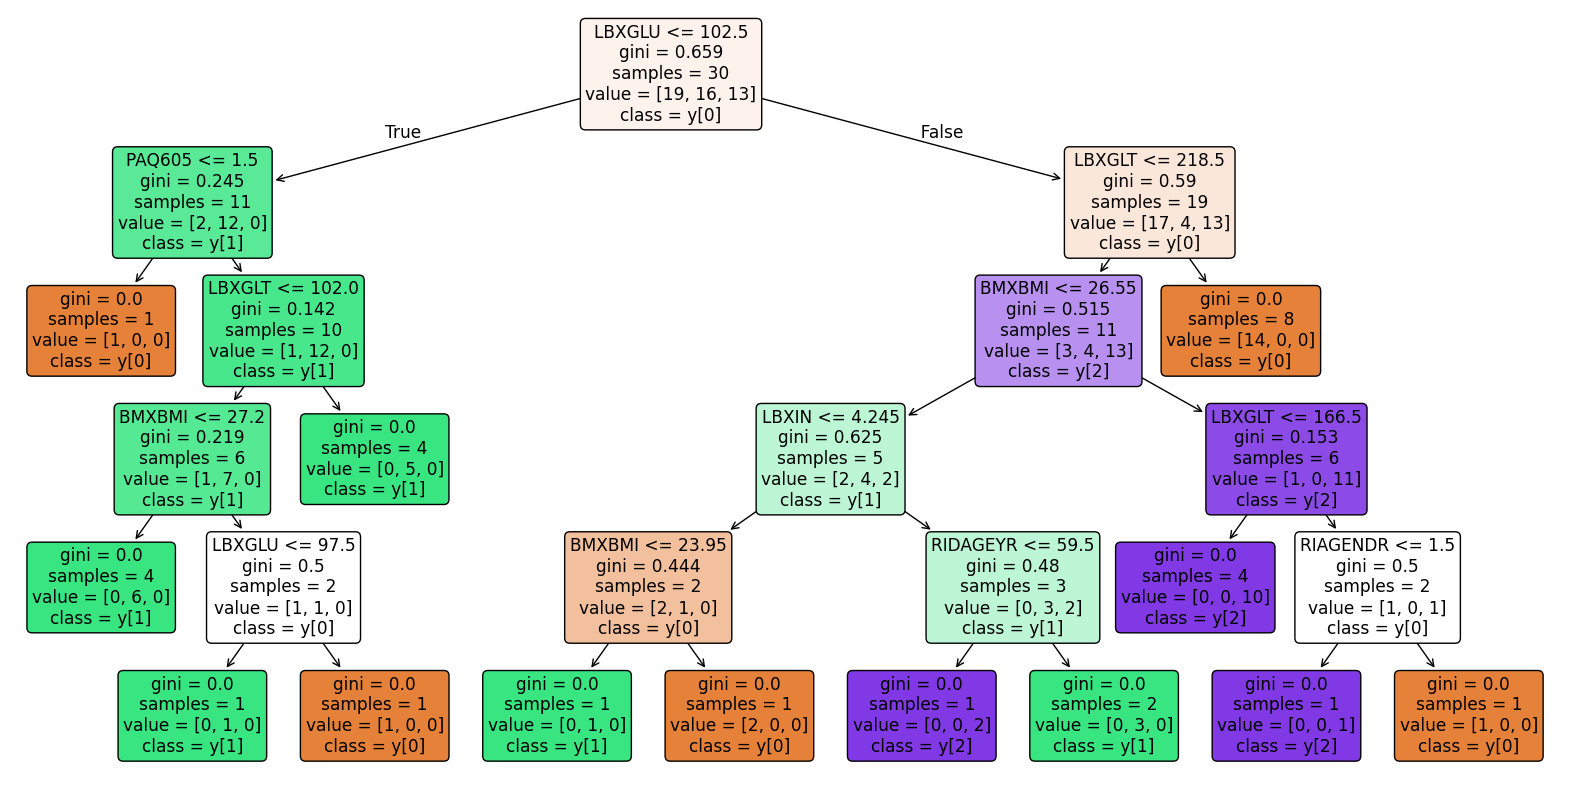

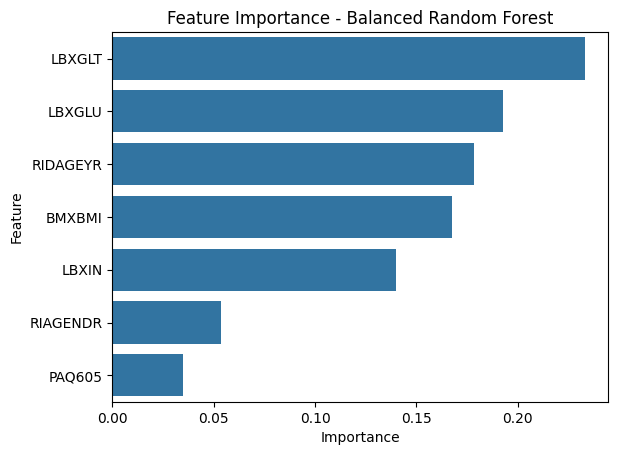

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Extract a single tree from the forest
estimator = classifier.estimators_[0]

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(estimator, filled=True, feature_names=xtrain.columns, class_names=True, rounded=True)
plt.show()

import pandas as pd
import seaborn as sns

# Get feature importances
feature_importances = classifier.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': xtrain.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances

sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance - Balanced Random Forest')
plt.show()


Accuracy: 0.9627

Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         5
         2.0       0.96      1.00      0.98       440
         3.0       0.00      0.00      0.00        11

    accuracy                           0.96       456
   macro avg       0.32      0.33      0.33       456
weighted avg       0.93      0.96      0.95       456



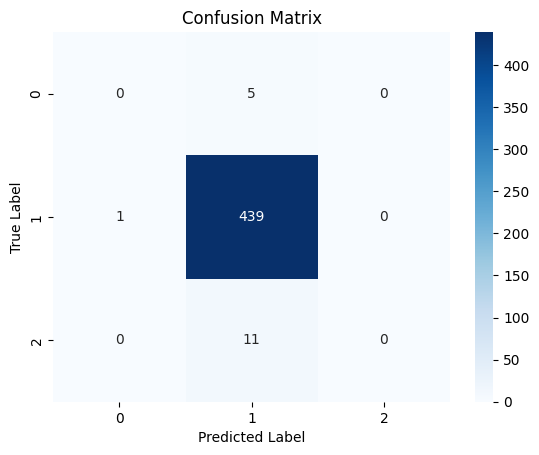

In [100]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create the BaggingClassifier
bagging_classifier = BaggingClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    n_estimators=10,  # Number of base estimators
    max_samples=0.8,  # Fraction of samples to draw for each base estimator
    max_features=0.8,  # Fraction of features to draw for each base estimator
    bootstrap=True,   # Whether to use bootstrap samples
    bootstrap_features=False,  # Whether to use bootstrap for feature selection
    random_state=42
)

# Fit the model
bagging_classifier.fit(xtrain, ytrain)

# Make predictions
y_pred = bagging_classifier.predict(xtest)

# Evaluate the model
accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(ytest, y_pred))

# Compute confusion matrix
cm = confusion_matrix(ytest, y_pred)

# Plot confusion matrix

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [29]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define base learners
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42)),
    ('gbc', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

# Define meta-learner
meta_learner = LogisticRegression()

# Create stacking classifier
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

# Train the stacking classifier
stacking_clf.fit(X_resampled_smote, y_resampled_smote)

# Predict on the test set
y_pred_stacking = stacking_clf.predict(xtest)

# Evaluate the model
print("Stacking Classifier")
print("Accuracy: ", accuracy_score(ytest, y_pred_stacking))
print("Confusion Matrix: \n", confusion_matrix(ytest, y_pred_stacking))
print("Classification Report: \n", classification_report(ytest, y_pred_stacking))


Stacking Classifier
Accuracy:  0.9385964912280702
Confusion Matrix: 
 [[  0   5   0]
 [  5 427   8]
 [  0  10   1]]
Classification Report: 
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         5
         2.0       0.97      0.97      0.97       440
         3.0       0.11      0.09      0.10        11

    accuracy                           0.94       456
   macro avg       0.36      0.35      0.36       456
weighted avg       0.93      0.94      0.94       456



In [34]:
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# Apply ADASYN
ada = ADASYN(sampling_strategy='minority', random_state=42, n_neighbors=7)
X_resampled_ada, y_resampled_ada = ada.fit_resample(xtrain, ytrain)

# Train a model (e.g., Random Forest)
rf = RandomForestClassifier(n_estimators=200)
rf.fit(X_resampled_ada, y_resampled_ada)
# Predict on the test set
y_pred_rf = rf.predict(xtest)

# Evaluate the model
print("Random Forest with ADASYN")
print("Accuracy: ", accuracy_score(ytest, y_pred_rf))
print("Confusion Matrix: \n", confusion_matrix(ytest, y_pred_rf))
print("Classification Report: \n", classification_report(ytest, y_pred_rf))


Random Forest with ADASYN
Accuracy:  0.9407894736842105
Confusion Matrix: 
 [[  1   4   0]
 [ 12 428   0]
 [  0  11   0]]
Classification Report: 
               precision    recall  f1-score   support

         1.0       0.08      0.20      0.11         5
         2.0       0.97      0.97      0.97       440
         3.0       0.00      0.00      0.00        11

    accuracy                           0.94       456
   macro avg       0.35      0.39      0.36       456
weighted avg       0.93      0.94      0.94       456



In [17]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_resampled_ada, y_resampled_ada)

best_rf = grid_search.best_estimator_


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


In [18]:
# After fitting the grid search
best_parameters = grid_search.best_params_

# Print the best parameters
print("Best parameters found by GridSearchCV:")
print(best_parameters)


Best parameters found by GridSearchCV:
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [37]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Adjust the class labels
ytrain_adjusted = ytrain - 1
ytest_adjusted = ytest - 1

# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.01,
    max_depth=5,
    scale_pos_weight=1,
    random_state=42,
    subsample=1.0,
    objective='multi:softmax',
)

# Train the model with adjusted labels
xgb_clf.fit(xtrain, ytrain_adjusted)

# Predict on the test set
y_pred_xgb_adjusted = xgb_clf.predict(xtest)

# Map predictions back to the original labels [1, 2, 3]
y_pred_xgb = y_pred_xgb_adjusted + 1

# Evaluate the model
print("XGBoost Classifier")
print("Accuracy: ", accuracy_score(ytest, y_pred_xgb))
print("Confusion Matrix: \n", confusion_matrix(ytest, y_pred_xgb))
print("Classification Report: \n", classification_report(ytest, y_pred_xgb))


XGBoost Classifier
Accuracy:  0.9627192982456141
Confusion Matrix: 
 [[  0   5   0]
 [  1 439   0]
 [  0  11   0]]
Classification Report: 
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         5
         2.0       0.96      1.00      0.98       440
         3.0       0.00      0.00      0.00        11

    accuracy                           0.96       456
   macro avg       0.32      0.33      0.33       456
weighted avg       0.93      0.96      0.95       456



In [36]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Adjust class labels from [1, 2, 3] to [0, 1, 2]
ytrain_adjusted = ytrain - 1
ytest_adjusted = ytest - 1

import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize XGBoost with a basic configuration
xgb_clf = xgb.XGBClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'scale_pos_weight': [1, 2, 5, 10]  # Adjust this based on class imbalance
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit GridSearchCV on the training data with adjusted labels
grid_search.fit(xtrain, ytrain_adjusted)

# Get the best model from the grid search
best_xgb = grid_search.best_estimator_

# Predict on the test set with adjusted labels
y_pred_xgb = best_xgb.predict(xtest)

# Map predictions back to original labels [1, 2, 3]
y_pred_xgb = y_pred_xgb + 1

# Evaluate the best model
print("Best XGBoost Classifier")
print("Best Parameters: ", grid_search.best_params_)
print("Accuracy: ", accuracy_score(ytest, y_pred_xgb))
print("Confusion Matrix: \n", confusion_matrix(ytest, y_pred_xgb))
print("Classification Report: \n", classification_report(ytest, y_pred_xgb))


Fitting 3 folds for each of 3888 candidates, totalling 11664 fits
Best XGBoost Classifier
Best Parameters:  {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 300, 'scale_pos_weight': 1, 'subsample': 1.0}
Accuracy:  0.9627192982456141
Confusion Matrix: 
 [[  0   5   0]
 [  1 439   0]
 [  0  11   0]]
Classification Report: 
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         5
         2.0       0.96      1.00      0.98       440
         3.0       0.00      0.00      0.00        11

    accuracy                           0.96       456
   macro avg       0.32      0.33      0.33       456
weighted avg       0.93      0.96      0.95       456



In [78]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Map the class labels to [0, 1, 2]
y_resampled_smote_mapped = y_resampled_smote.map({1.0: 0, 2.0: 1, 3.0: 2})
ytest_mapped = ytest.map({1.0: 0, 2.0: 1, 3.0: 2})

# Initialize the XGBoost classifier
xgb_clf_smote = xgb.XGBClassifier(
    n_estimators=300,
    max_depth=4,
    min_child_weight=1,
    subsample=1.0,
    scale_pos_weight=1,
    colsample_bytree=1,
    learning_rate=0.1,
    gamma=0,
    random_state=42
)

# Train the model on SMOTE resampled data
xgb_clf_smote.fit(X_resampled_smote, y_resampled_smote_mapped)

# Predict on the test set
y_pred_xgb_smote = xgb_clf_smote.predict(xtest)

# Map predictions back to original labels
y_pred_xgb_smote_mapped = pd.Series(y_pred_xgb_smote).map({0: 1.0, 1: 2.0, 2: 3.0})

# Evaluate the model
print("XGBoost Classifier with SMOTE Resampled Data")
print("Accuracy: ", accuracy_score(ytest, y_pred_xgb_smote_mapped))
print("Confusion Matrix: \n", confusion_matrix(ytest, y_pred_xgb_smote_mapped))
print("Classification Report: \n", classification_report(ytest, y_pred_xgb_smote_mapped))


XGBoost Classifier with SMOTE Resampled Data
Accuracy:  0.918859649122807
Confusion Matrix: 
 [[  1   4   0]
 [  9 417  14]
 [  0  10   1]]
Classification Report: 
               precision    recall  f1-score   support

         1.0       0.10      0.20      0.13         5
         2.0       0.97      0.95      0.96       440
         3.0       0.07      0.09      0.08        11

    accuracy                           0.92       456
   macro avg       0.38      0.41      0.39       456
weighted avg       0.94      0.92      0.93       456



In [84]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Map the class labels to [0, 1, 2]
y_resampled_ada_mapped = y_resampled_ada.map({1.0: 0, 2.0: 1, 3.0: 2})
ytest_mapped = ytest.map({1.0: 0, 2.0: 1, 3.0: 2})

# Initialize the XGBoost classifier
xgb_clf_ada = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

# Train the model on ADASYN resampled data
xgb_clf_ada.fit(X_resampled_ada, y_resampled_ada_mapped)

# Predict on the test set
y_pred_xgb_ada = xgb_clf_ada.predict(xtest)

# Map predictions back to original labels
y_pred_xgb_ada_mapped = pd.Series(y_pred_xgb_ada).map({0: 1.0, 1: 2.0, 2: 3.0})

# Evaluate the model
print("XGBoost Classifier with ADASYN Resampled Data")
print("Accuracy: ", accuracy_score(ytest, y_pred_xgb_ada_mapped))
print("Confusion Matrix: \n", confusion_matrix(ytest, y_pred_xgb_ada_mapped))
print("Classification Report: \n", classification_report(ytest, y_pred_xgb_ada_mapped))


XGBoost Classifier with ADASYN Resampled Data
Accuracy:  0.9342105263157895
Confusion Matrix: 
 [[  1   4   0]
 [ 14 425   1]
 [  0  11   0]]
Classification Report: 
               precision    recall  f1-score   support

         1.0       0.07      0.20      0.10         5
         2.0       0.97      0.97      0.97       440
         3.0       0.00      0.00      0.00        11

    accuracy                           0.93       456
   macro avg       0.34      0.39      0.36       456
weighted avg       0.93      0.93      0.93       456



In [18]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Map the class labels to [0, 1, 2]
y_resampled_ada_mapped = y_resampled_ada.map({1.0: 0, 2.0: 1, 3.0: 2})
ytest_mapped = ytest.map({1.0: 0, 2.0: 1, 3.0: 2})

# Initialize the XGBoost classifier
xgb_clf_ada = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

# Train the model on ADASYN resampled data
xgb_clf_ada.fit(X_resampled_ada, y_resampled_ada_mapped)

# Predict on the test set
y_pred_xgb_ada = xgb_clf_ada.predict(xtest)

# Map predictions back to original labels
y_pred_xgb_ada_mapped = pd.Series(y_pred_xgb_ada).map({0: 1.0, 1: 2.0, 2: 3.0})

# Evaluate the model
print("XGBoost Classifier with ADASYN Resampled Data")
print("Accuracy: ", accuracy_score(ytest, y_pred_xgb_ada_mapped))
print("Confusion Matrix: \n", confusion_matrix(ytest, y_pred_xgb_ada_mapped))
print("Classification Report: \n", classification_report(ytest, y_pred_xgb_ada_mapped))


NameError: name 'y_resampled_ada' is not defined

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 826
[LightGBM] [Info] Number of data points in the train set: 1822, number of used features: 7
[LightGBM] [Info] Start training from score -4.735101
[LightGBM] [Info] Start training from score -0.035189
[LightGBM] [Info] Start training from score -3.657542
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[13]	valid_0's multi_logloss: 0.151994

Original Data - Accuracy: 0.9649

Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         5
         2.0       0.96      1.00      0.98       440
         3.0       0.00      0.00      0.00        11

    accuracy                           0.96       456
   macro avg

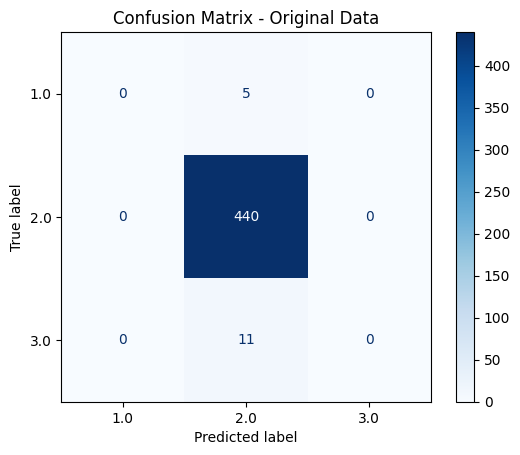

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 5277, number of used features: 7
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[86]	valid_0's multi_logloss: 0.266019

Oversampled Data - Accuracy: 0.9057

Classification Report:
              precision    recall  f1-score   support

         1.0       0.07      0.20      0.10         5
         2.0       0.97      0.93      0.95       440
         3.0       0.11      0.18      0.14        11

    accuracy                           0.91       456
   macro avg       0.38      0.44      0.40       456
weighted avg       0.94      

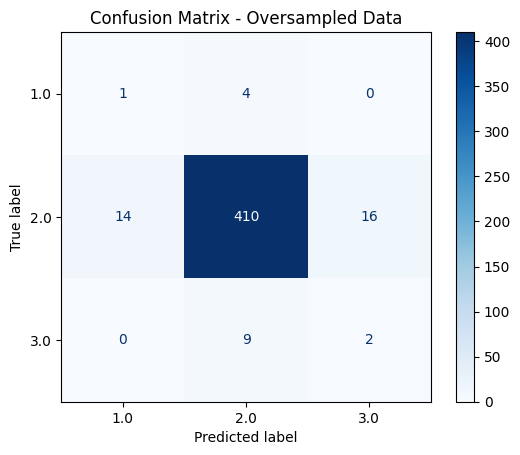

In [110]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

def train_and_evaluate_lgbm(X_train, y_train, X_test, y_test, title, le):
    # Transform labels to 0-indexed
    y_train_encoded = le.transform(y_train)
    y_test_encoded = le.transform(y_test)

    # Create dataset for LightGBM
    lgb_train = lgb.Dataset(X_train, y_train_encoded)
    lgb_eval = lgb.Dataset(X_test, y_test_encoded, reference=lgb_train)

    # Parameters
    params = {
        'boosting_type': 'gbdt',
        'objective': 'multiclass',
        'num_class': 3,
        'metric': 'multi_logloss',
        'num_leaves': 31,
        'learning_rate': 0.05,
        'feature_fraction': 0.9
    }

    # Train
    model = lgb.train(params,
                      lgb_train,
                      num_boost_round=100,
                      valid_sets=[lgb_eval],
                      callbacks=[lgb.early_stopping(stopping_rounds=10)])

    # Predict
    y_pred = model.predict(X_test, num_iteration=model.best_iteration)
    y_pred_class = y_pred.argmax(axis=1)

    # Transform predictions back to original labels
    y_pred_original = le.inverse_transform(y_pred_class)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred_original)
    print(f"\n{title} - Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred_original))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred_original)
    print("\nConfusion Matrix:")
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.show()

# Create a LabelEncoder
le = LabelEncoder()
le.fit(ytrain)

# Train and evaluate on original data
train_and_evaluate_lgbm(xtrain, ytrain, xtest, ytest, "Original Data", le)

# Oversample the minority classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(xtrain, ytrain)

# Train and evaluate on oversampled data
train_and_evaluate_lgbm(X_train_resampled, y_train_resampled, xtest, ytest, "Oversampled Data", le)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(xtrain, ytrain)

# Predictions and evaluation
y_pred_dt = dt_model.predict(xtest)
print("Decision Tree Accuracy:", accuracy_score(ytest, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(ytest, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(ytest, y_pred_dt))

Decision Tree Accuracy: 0.9144736842105263
Decision Tree Classification Report:
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         5
         2.0       0.96      0.95      0.96       440
         3.0       0.00      0.00      0.00        11

    accuracy                           0.91       456
   macro avg       0.32      0.32      0.32       456
weighted avg       0.93      0.91      0.92       456

Confusion Matrix:
 [[  0   5   0]
 [  5 417  18]
 [  0  11   0]]
